### Inter annotator agreements analysis for Round 2 Annotations for sentences with Verb modifiers.
- Author: Sushma Anand Akoju, Email: sushmaakoju@arizona.edu

In [1]:
!pip install agreement

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install krippendorff

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install pycm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 595 kB 20.2 MB/s 


In [4]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)
%cd gdrive/MyDrive/Colab\ Notebooks/natural\-logic
!ls

Mounted at /content/gdrive/
/content/gdrive/MyDrive/Colab Notebooks/natural-logic
 annotations_round2.xlsx
 clean
 clean.tar.xz
 dec5th_results
 example-annotation-round-1-2.xlsx
 example-annotation-round-1.gsheet
 example-predictions-for-rsa.gsheet
 example-predictions-for-rsa.xlsx
 final-datasets
 folio
 FOLIO_dataset_extraction_solvers.ipynb
 logic-summer-school-FOTP.pdf
 modified-examples-annotations-sa.xlsx
'modified_noun_phrases (1).gsheet'
'modified_noun_phrases (2).gsheet'
'modified_noun_phrases (3).gsheet'
'modified_noun_phrases (4).gsheet'
'modified_noun_phrases (5).gsheet'
'modified_noun_phrases (6).gsheet'
 modified_noun_phrases.csv
 modified_noun_phrases.gsheet
 modified_sentences1.csv
'modified_sentences (1).gsheet'
 modified_sentences1.gsheet
'modified-sentences (1).xlsx'
 modified_sentences.csv
 modified-sentences-dec1.xlsx
 modified_sentences.gsheet
'modified_verb_phrases (1).gsheet'
'modified_verb_phrases (2).gsheet'
'modified_verb_phrases (3).gsheet'
 modified_verb_p

In [5]:
import sklearn.metrics
from sklearn.metrics import cohen_kappa_score

In [6]:
import pandas as pd
import numpy as np

In [7]:
filename = "/content/gdrive/MyDrive/Colab Notebooks/natural-logic/example-annotation-round-1-2.xlsx"

In [8]:
import os
os.path.exists(filename)

True

In [34]:
df = pd.read_excel(filename, sheet_name="round2")[['Mihai\'s Labels', 'Eduardo\'s label', 'Robert\'s labels',
       'Haris\'s labels', 'Sushma\'s labels']]
names = df.columns

In [35]:
df.columns

Index(['Mihai's Labels', 'Eduardo's label', 'Robert's labels',
       'Haris's labels', 'Sushma's labels'],
      dtype='object')

## Labelling annotator names to numbers 1 through 5 respectively

In [36]:
df = df.rename(columns={'Mihai\'s Labels':1, 'Eduardo\'s label':2, 'Robert\'s labels':3,
       'Haris\'s labels':4, 'Sushma\'s labels':5})

In [37]:
df[5].unique()

array(['FE', 'RE', 'Neutral', 'Negation'], dtype=object)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       52 non-null     object
 1   2       52 non-null     object
 2   3       52 non-null     object
 3   4       52 non-null     object
 4   5       52 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB


## Labelling the labels names to numbers 1 through 7 respectively
'FE':1 
'RE':2 
'Negation':3
'Cover':4
'Alternation':5
'Equivalence':6
'Neutral':7

In [39]:
label_map = {'FE':1, 'RE':2, 'Negation':3, 'Cover':4, 'Alternation':5, 'Equivalence':6, 'Neutral':7}

In [40]:
for i in range(1,6):
  df[i] = df[i].map(label_map)
  

In [42]:
df.head()

,1,2,3,4,5
0,1,1,1.0,1,1
1,1,7,1.0,1,1
2,2,7,2.0,2,2
3,2,7,2.0,2,1
4,1,1,1.0,1,1


## Remove a couple of rows (which are repetition of original premise hypothesis pair


In [43]:
df = df.dropna(axis='rows')

In [44]:
df.head()

,1,2,3,4,5
0,1,1,1.0,1,1
1,1,7,1.0,1,1
2,2,7,2.0,2,2
3,2,7,2.0,2,1
4,1,1,1.0,1,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 51
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       50 non-null     int64  
 1   2       50 non-null     int64  
 2   3       50 non-null     float64
 3   4       50 non-null     int64  
 4   5       50 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 2.3 KB


In [46]:
target = ['FE', 'RE', 'Neutral', 'Equivalence', 'Cover', 'Negation']

## Cohen Kappa Score
A pairwise inetr-rater reliability statistic. 
Considering probability of agreement by chance.
We have 7 labels and 5 annotators and 52 observations in total.
So labels are mutually exclusive. (Assume so for now)
$p_0$ relative observed agreement
$p_1$ hypothetical agreement by chance
$p_0 = \frac{1}{52^7} \sum n_{k_1} n_{k_2} $  where $n_{k_1}$ and $n_{k_2}$ are number of times rater i (first or second) labelled k. 

These scores are calculated pairwise so at any time it is agreement between two raters.

In [47]:
labellers = {1:'Mihai\'s Labels', 2:'Eduardo\'s label', 3:'Robert\'s labels',
       4:'Haris\'s labels', 5:'Sushma\'s labels'}
cohen_kappa_scores = {}
for i in range(1,5):
  for j in range(2,6):
    if i != j:
      cohen_kappa_scores[(labellers[i], labellers[j])] = cohen_kappa_score(df[i], df[j])
      print(cohen_kappa_scores[(labellers[i], labellers[j])])

0.8834498834498834
0.8157700810611643
0.8135719612229679
0.7628458498023716
0.704360679970436
0.69558599695586
0.6802557953637091
0.704360679970436
0.7855611150822016
0.698340874811463
0.69558599695586
0.7855611150822015
0.6572734196496572


## Pairwise agreement Cohen Kappa scores

In [48]:
cohen_kappa_scores

{("Mihai's Labels", "Eduardo's label"): 0.8834498834498834,
 ("Mihai's Labels", "Robert's labels"): 0.8157700810611643,
 ("Mihai's Labels", "Haris's labels"): 0.8135719612229679,
 ("Mihai's Labels", "Sushma's labels"): 0.7628458498023716,
 ("Eduardo's label", "Robert's labels"): 0.704360679970436,
 ("Eduardo's label", "Haris's labels"): 0.69558599695586,
 ("Eduardo's label", "Sushma's labels"): 0.6802557953637091,
 ("Robert's labels", "Eduardo's label"): 0.704360679970436,
 ("Robert's labels", "Haris's labels"): 0.7855611150822016,
 ("Robert's labels", "Sushma's labels"): 0.698340874811463,
 ("Haris's labels", "Eduardo's label"): 0.69558599695586,
 ("Haris's labels", "Robert's labels"): 0.7855611150822015,
 ("Haris's labels", "Sushma's labels"): 0.6572734196496572}

In [49]:
modified_df = df.copy()
modified_df[2][modified_df[2] ==4] = 7
modified_df[5].mask(modified_df[5] == 4 ,7, inplace=True)
modified_df[5].mask(modified_df[5] == 5 ,7, inplace=True)
modified_df[5].mask(modified_df[5] == 6 ,7, inplace=True)
modified_df[4].mask(modified_df[4] == 4 ,7, inplace=True)
modified_df[4].mask(modified_df[4] == 5 ,7, inplace=True)
modified_df[4].mask(modified_df[4] == 6 ,7, inplace=True)

<ipython-input-49-b3f084d9ad35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df[2][modified_df[2] ==4] = 7


In [50]:
modified_df[1] = modified_df[1].astype('int')
modified_df[3] = modified_df[3].astype('int')

### Label-wise agreements (as a confusion matrix)
- First we'd like to assess the maximum agreement between each pair of annotators for each label they labelled.
- We consider that Mihai's labels as Gold standard for a point of reference closer to ground truth.
- We also consider that there might be maximum Forward Entailments considering it was the label most chosen. This also partially makes this an imbalanced class distribution even though these are not Ground truth labels.

In [51]:
from pycm import *
labellers = {1:'Mihai\'s Labels', 2:'Eduardo\'s label', 3:'Robert\'s labels',
       4:'Haris\'s labels', 5:'Sushma\'s labels'}
cm = ConfusionMatrix(actual_vector=modified_df[1].to_numpy(), predict_vector=modified_df[2].to_numpy()) 

In [52]:
modified_df = df.copy()
modified_df[1].to_numpy()

array([1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 7, 7, 1, 1, 7, 1, 7, 7, 1, 7, 2, 1,
       7, 1, 1, 7, 1, 1, 7, 1, 1, 7, 1, 1, 7, 1, 7, 7, 1, 1, 7, 1, 1, 7,
       1, 1, 7, 1, 7, 1])

## Seeing maximum agreement for the label that was chosen most of the times for just two annotators.

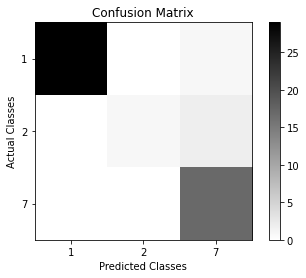

In [53]:
cm.plot()

In [54]:
cm.table

{1: {1: 29, 2: 0, 7: 1}, 2: {1: 0, 2: 1, 7: 2}, 7: {1: 0, 2: 0, 7: 17}}

In [70]:
modified_df[3] = modified_df[3].astype('int')
modified_df.value_counts()

1  2  3  4  5
1  1  1  1  1    24
7  7  7  7  7    12
1  1  1  7  1     3
7  7  2  7  7     2
1  1  2  1  7     1
      7  7  1     1
   7  1  1  1     1
2  2  2  2  7     1
   7  2  2  1     1
            2     1
7  7  1  1  1     1
      7  7  1     1
            3     1
dtype: int64

### Label-wise counts per anotator

- Mihai
  - FE : 30
  - RE : 3
  - Neutral : 17

- Eduardo
  - FE : 29
  - RE : 1
  - Neutral : 20

- Robert
  - FE : 29
  - RE : 6
  - Neutral : 15

- Haris
  - FE : 27
  - RE : 3
  - Neutral : 20

- Sushma
  - FE : 32
  - RE : 1
  - Neutral : 16
  - Negation: 1

In [74]:
print(modified_df[1].value_counts())
print(modified_df[2].value_counts()) 
print(modified_df[3].value_counts())
print(modified_df[4].value_counts())
print(modified_df[5].value_counts())

1    30
7    17
2     3
Name: 1, dtype: int64
1    29
7    20
2     1
Name: 2, dtype: int64
1    29
7    15
2     6
Name: 3, dtype: int64
1    27
7    20
2     3
Name: 4, dtype: int64
1    32
7    16
2     1
3     1
Name: 5, dtype: int64


## Observing F1, precision and recall scores for pairwise confusion matrices.
In this case, we consider a case where each annotator i can be Gold label annotator and compared with every other annotator j from remaining 4 annotators. So we consider the case that chosen Gold labels i.e. annotator's labels as Ground truth and we calculate pairwise "Supposed Gold label" with another annotator's labels. 

This is to say between any two annotators, we choose any one annotator, we would like to see how much agreement can exist and how would that reflect as F1, precision and recall scores.

- For each pair of annotators, consider ith annotator to have ground truth and jth annotator to be prediction labels.
- We still observe maximum agreement >80% for Forward Entailment and Neutral Labels while RE (although likely 3 such ground truth labels could exist) agreement is 50%.
- We do observe ~80% precision, recall and F1-scores. Would not be very helpful, since we do not have "True Gold labels". 
- We use the following information for assessing how to design annotation schemes annotating automatically modified premise, hypothesis sentences with Generalized quantifiers as well as Adjectives & adverbs.
- We want to observe the amount of labeling confusion that quantifiers and modifiers introduce.
- We consider that wherever the label is not FE or RE, we can see maximum confusion. 
- Forward Entailment - has max agreement & is also most chosen label
- Neutral - has third most agreement & is second most chosen label
- Reverse Entailment - has second most agreement & is third most chosen label.
- All other cases, signify confusion due to level of difficulty.

Total 52 * 5 = 260 labels required by 5 annotators for 53 premise, hypothesis pairs. We excluded one invalid sentence, so 259 total labels should have been there. But Robert did not label 2 of premise, hypothesis pairs. So we would have 257 labels in total.

1.  FE	- 147
2.  RE - 14
3.  Neutral - 91
4.  Negation - 5

None of the following noted in round 2:

5.  Cover - 0
6.  Alternation - 0
7.  Equivalence - 0

Mihai's labels seems to serve as a better and more agreed point of reference for Ground Truth. 

This will help to develop an annotation scheme.

In [55]:
labellers = {1:'Mihai\'s Labels', 2:'Eduardo\'s label', 3:'Robert\'s labels',
       4:'Haris\'s labels', 5:'Sushma\'s labels'}
cm = {}
for i in range(1,5):
  for j in range(2,6):
    if i != j:
      cm[(labellers[i], labellers[j])] = ConfusionMatrix(actual_vector=modified_df[i].to_numpy(), predict_vector=modified_df[j].to_numpy())
      print(cm[(labellers[i], labellers[j])])

Predict  1        2        7        
Actual
1        29       0        1        

2        0        1        2        

7        0        0        17       





Overall Statistics : 

95% CI                                                            (0.87417,1.00583)
ACC Macro                                                         0.96
ARI                                                               0.86262
AUNP                                                              0.95455
AUNU                                                              0.86818
Bangdiwala B                                                      0.9324
Bennett S                                                         0.91
CBA                                                               0.71667
CSI                                                               0.71667
Chi-Squared                                                       60.91667
Chi-Squared DF                                                    4
Con

### Seeing the Confusion matrix density plots for Max agreement between each pair of annotators.

("Mihai's Labels", "Eduardo's label")
AxesSubplot(0.125,0.125;0.62x0.755)
("Mihai's Labels", "Robert's labels")
AxesSubplot(0.125,0.125;0.62x0.755)
("Mihai's Labels", "Haris's labels")
AxesSubplot(0.125,0.125;0.62x0.755)
("Mihai's Labels", "Sushma's labels")
AxesSubplot(0.125,0.125;0.62x0.755)
("Eduardo's label", "Robert's labels")
AxesSubplot(0.125,0.125;0.62x0.755)
("Eduardo's label", "Haris's labels")
AxesSubplot(0.125,0.125;0.62x0.755)
("Eduardo's label", "Sushma's labels")
AxesSubplot(0.125,0.125;0.62x0.755)
("Robert's labels", "Eduardo's label")
AxesSubplot(0.125,0.125;0.62x0.755)
("Robert's labels", "Haris's labels")
AxesSubplot(0.125,0.125;0.62x0.755)
("Robert's labels", "Sushma's labels")
AxesSubplot(0.125,0.125;0.62x0.755)
("Haris's labels", "Eduardo's label")
AxesSubplot(0.125,0.125;0.62x0.755)
("Haris's labels", "Robert's labels")
AxesSubplot(0.125,0.125;0.62x0.755)
("Haris's labels", "Sushma's labels")
AxesSubplot(0.125,0.125;0.62x0.755)


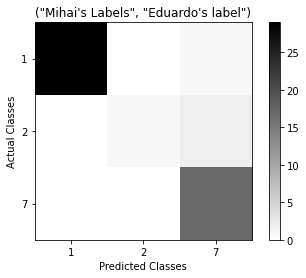

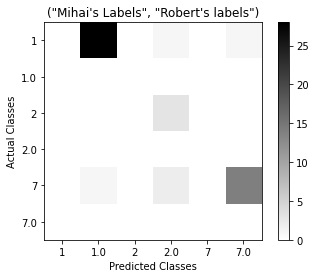

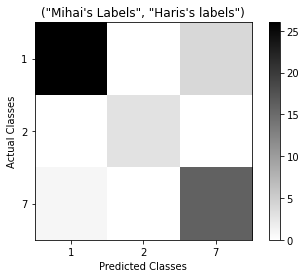

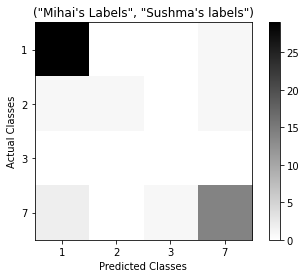

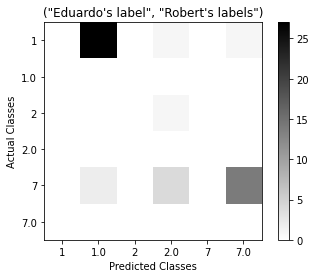

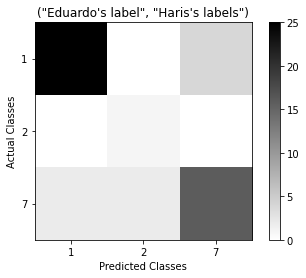

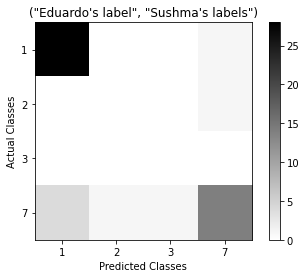

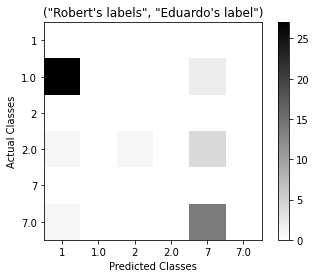

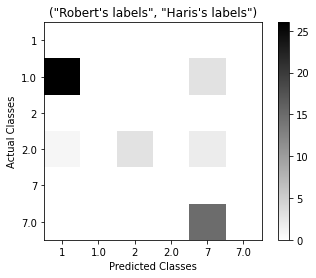

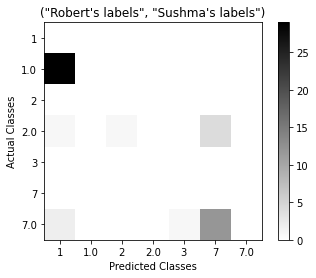

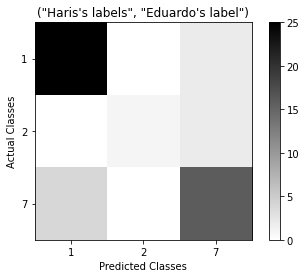

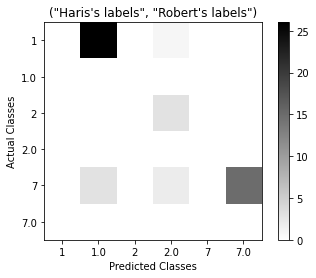

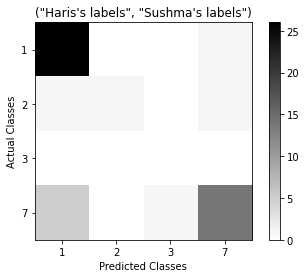

In [56]:
for k,v in cm.items():
  print(k)
  print(v.plot(title=k))

### Looking at total agreement counts for each label between each pair of annotators.
- Max agreement is for FE, then RE and then Neutral.
- Could also signify it is probably easier to agree on a Forward Entailment.
- Could also signify RE and Neutral are next most agreed labels.
- Could we say if agreement was most, complexity to identify each of these three labels was easy?

In [57]:
for k,v in cm.items():
  print(k)
  print(v.table)

("Mihai's Labels", "Eduardo's label")
{1: {1: 29, 2: 0, 7: 1}, 2: {1: 0, 2: 1, 7: 2}, 7: {1: 0, 2: 0, 7: 17}}
("Mihai's Labels", "Robert's labels")
{'1': {'1': 0, '1.0': 28, '2': 0, '2.0': 1, '7': 0, '7.0': 1}, '1.0': {'1': 0, '1.0': 0, '2': 0, '2.0': 0, '7': 0, '7.0': 0}, '2': {'1': 0, '1.0': 0, '2': 0, '2.0': 3, '7': 0, '7.0': 0}, '2.0': {'1': 0, '1.0': 0, '2': 0, '2.0': 0, '7': 0, '7.0': 0}, '7': {'1': 0, '1.0': 1, '2': 0, '2.0': 2, '7': 0, '7.0': 14}, '7.0': {'1': 0, '1.0': 0, '2': 0, '2.0': 0, '7': 0, '7.0': 0}}
("Mihai's Labels", "Haris's labels")
{1: {1: 26, 2: 0, 7: 4}, 2: {1: 0, 2: 3, 7: 0}, 7: {1: 1, 2: 0, 7: 16}}
("Mihai's Labels", "Sushma's labels")
{1: {1: 29, 2: 0, 3: 0, 7: 1}, 2: {1: 1, 2: 1, 3: 0, 7: 1}, 3: {1: 0, 2: 0, 3: 0, 7: 0}, 7: {1: 2, 2: 0, 3: 1, 7: 14}}
("Eduardo's label", "Robert's labels")
{'1': {'1': 0, '1.0': 27, '2': 0, '2.0': 1, '7': 0, '7.0': 1}, '1.0': {'1': 0, '1.0': 0, '2': 0, '2.0': 0, '7': 0, '7.0': 0}, '2': {'1': 0, '1.0': 0, '2': 0, '2.0': 1, '7':

## Cohen Kappa scores for modified labels 
Total 52 * 5 = 260 labels required by 5 annotators for 53 premise, hypothesis pairs. We excluded one invalid sentence, so 259 total labels should have been there. But Robert did not label 2 of premise, hypothesis pairs. So we would have 257 labels in total.

1.  FE	- 147
2.  RE - 14
3.  Neutral - 91
4.  Negation - 5

So we recalculate the Cohen kappa scores.

In [58]:
labellers = {1:'Mihai\'s Labels', 2:'Eduardo\'s label', 3:'Robert\'s labels',
       4:'Haris\'s labels', 5:'Sushma\'s labels'}
cohen_kappa_scores_modified = {}
for i in range(1,5):
  for j in range(2,6):
    if i != j:
      cohen_kappa_scores_modified[(labellers[i], labellers[j])] = cohen_kappa_score(df[i], df[j])
      print(cohen_kappa_scores_modified[(labellers[i], labellers[j])])

0.8834498834498834
0.8157700810611643
0.8135719612229679
0.7628458498023716
0.704360679970436
0.69558599695586
0.6802557953637091
0.704360679970436
0.7855611150822016
0.698340874811463
0.69558599695586
0.7855611150822015
0.6572734196496572


## Fleiss Kappa scores
This is another way of finding above the level of agreement expected by chance. This considers random sampling among the raters (a little better than voted ratings, due to "randomness").
Although this is purely statistical, since we have types of modifiers which influence thge rater's choice of label, we consider this for some "randomized" assessment for a approximated agreement scores. 

The score considers that if no one chose "this" label, we could still find out expected chance of agreement on "this" label.

This does not tell if agreement is good enough. But just that if an agreement exists then how better is it to that of agreement by chance which in this case is 74.96%.

In [59]:
from statsmodels.stats import inter_rater as irr
data, categories = irr.aggregate_raters(modified_df.to_numpy())
irr.fleiss_kappa(data, method='fleiss')

0.7496206373292867

### Krippendorff's Alpha
Essentially measures amount of reliability as a measure of disagreement.
However this might not be relevant here, since we do not have concrete Ground truth. But if we did assume we did have Ground truth and this was reliable, this is how much reliable these labels based on agreement calculated from ratio of observed disagreement and disagreement expected by chance can be.

Here krippendorff's alpha is 76.79%

In [60]:
import krippendorff
krippendorff.alpha(modified_df.to_numpy().T)

0.7679447583126233

In [61]:
modified_df.to_numpy()

array([[1., 1., 1., 1., 1.],
       [1., 7., 1., 1., 1.],
       [2., 7., 2., 2., 2.],
       [2., 7., 2., 2., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [7., 7., 7., 7., 7.],
       [7., 7., 7., 7., 7.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [7., 7., 7., 7., 1.],
       [1., 1., 7., 7., 1.],
       [7., 7., 1., 1., 1.],
       [7., 7., 2., 7., 7.],
       [1., 1., 1., 7., 1.],
       [7., 7., 7., 7., 7.],
       [2., 2., 2., 2., 7.],
       [1., 1., 1., 1., 1.],
       [7., 7., 7., 7., 7.],
       [1., 1., 1., 7., 1.],
       [1., 1., 1., 1., 1.],
       [7., 7., 7., 7., 7.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [7., 7., 7., 7., 7.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [7., 7., 7., 7., 7.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [7., 7.

In [62]:
import agreement
from agreement.utils.kernels import linear_kernel

from agreement.metrics import cohens_kappa, krippendorffs_alpha, scotts_pi
from agreement.utils.transform import pivot_table_frequency


In [63]:
this_array = []
for i,l in enumerate(modified_df.to_numpy()):
  for k in range(0,5):
    this_array.append([i,k+1, l[k]])
arr = np.array(this_array)
questions_answers_table = pivot_table_frequency(arr[:, 0], arr[:, 2])

### Recomputing Cohen's kappa, krippendorff's alpha while calculating Scott's pi

Scott's Pi is similar to Cohen's kappa, except it considered squared joint proportions to calculate inter-annotator reliability.

In this case, Scott's pi is 74.96% same as Cohen's kappa

In [64]:
users_answers_table = pivot_table_frequency(arr[:, 1], arr[:, 2])
kappa = cohens_kappa(questions_answers_table, users_answers_table)
weighted_kappa = cohens_kappa(questions_answers_table, users_answers_table, weights_kernel=linear_kernel)

alpha = krippendorffs_alpha(questions_answers_table)
pi = scotts_pi(questions_answers_table)

In [65]:
kappa, weighted_kappa, alpha, pi

(0.7501135847342117,
 0.7745047667979679,
 0.7506221547799696,
 0.7496206373292866)

In [66]:
modified_df[[2,3,4,5]].to_numpy().shape

(50, 4)